In [20]:
# pip install xgboost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import xgboost as xgb
import math

from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, GridSearchCV 


import warnings
warnings.filterwarnings('ignore')

## XGBoost Reg

In [21]:
data=load_diabetes(as_frame=True)
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [22]:
df=data.frame
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [23]:
X=df.drop(['target'], axis=1)
y=df['target']

In [24]:
# train, test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
def LR(x,y):
    z=np.polyfit(x,y,1)
    p=np.poly1d(z)
    return p

{'gamma': 3, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
train set R^2 score: 0.9999093684338316
test set R^2 score: 0.3928577959456204
RMSE: 56.716236916855955


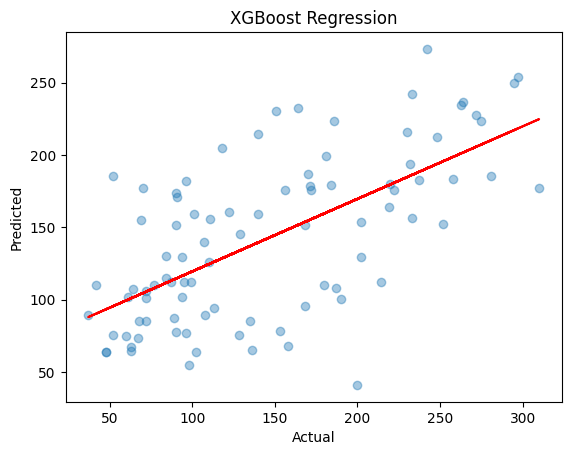

In [29]:
import xgboost as xgb


model=xgb.XGBRegressor()

param_grid={
   'n_estimators' : [100,200,300],
   'learning_rate' : [0.01,0.1],
   'max_depth' : [7,8,9,10],
   'gamma' : [0,1,2,3],    
}

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='r2', refit=True, n_jobs=-1)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
print(grid_search.best_params_)

model.fit(X_train, y_train)
pred = model.predict(X_test)
score = model.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
print("train set R^2 score:", model.score(X_train, y_train))
print("test set R^2 score:", model.score(X_test, y_test))
print("RMSE:", rmse)

plt.scatter(y_test, pred, alpha=0.4)
pylab.plot(y_test, LR(y_test, pred)(y_test), 'r-')
plt.title("XGBoost Regression")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## XGBoost Classifier

In [30]:
data2=load_breast_cancer(as_frame=True)
print(data2.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [31]:
df2=data2.frame
df2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [52]:
X=df2.drop(['target'], axis=1)
y=df2['target']

In [53]:
# train, test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
import xgboost as xgb

# Grid Search로 찾아낸 값
model=xgb.XGBClassifier()

param_grid={
   'n_estimators' : [100,200,300],
   'learning_rate' : [0.01,0.1],
   'max_depth' : [7,8,9,10],
   'gamma' : [0,1,2,3],
   
}

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy', refit=True, n_jobs=-1)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
print(grid_search.best_params_)
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print(score)
print("train_score : {} ".format(model.score(X_train, y_train)))
print("test_score : {} ".format(model.score(X_test, y_test)))


{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
0.9649122807017544
train_score : 1.0 
test_score : 0.9649122807017544 


In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
print('Accuracy : ', accuracy_score(y_test, y_pred))
confusion_matrix=confusion_matrix(y_test, y_pred)

Accuracy :  0.9649122807017544


<Axes: >

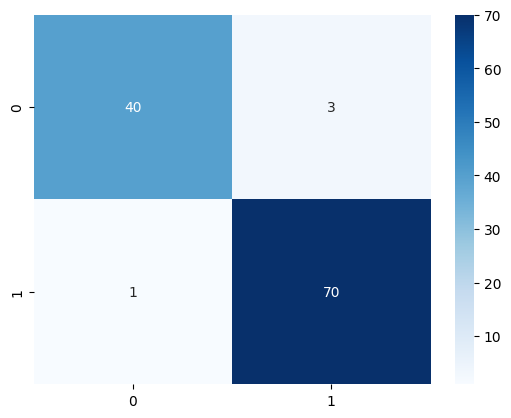

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')